# 1. Preparando o ambiente
Neste passo é feito a instalação das bibliotecas e recursos necessários

Como o Colab usa um computador com sistema operacional Linux, usamos o comando *!sudo apt intall tesseract-ocr* para fazer o download do pacote


In [48]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Instalando o pytesseract - biblioteca que sera

In [49]:
!pip install pytesseract

Criando a pasta que vai ter o idioma do tesseract e importando do github

***Necessário importar as imagens para a pasta imagens***

In [110]:
!mkdir tessdata
!mkdir Imagens

mkdir: cannot create directory ‘tessdata’: File exists


In [51]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2024-06-29 22:11:56--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-06-29 22:11:56--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-06-29 22:11:56--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

Importando as bibliotecas de apoio e validando as versões de cada uma

In [52]:
import cv2
import pytesseract

In [53]:
cv2.__version__

'4.8.0'

In [54]:
pytesseract.__version__

'0.3.10'

#2. Fazendo a Leitura das Imagens

In [55]:
imagem = cv2.imread("/content/Imagens/trecho_livro.png")

In [56]:
from google.colab.patches import cv2_imshow

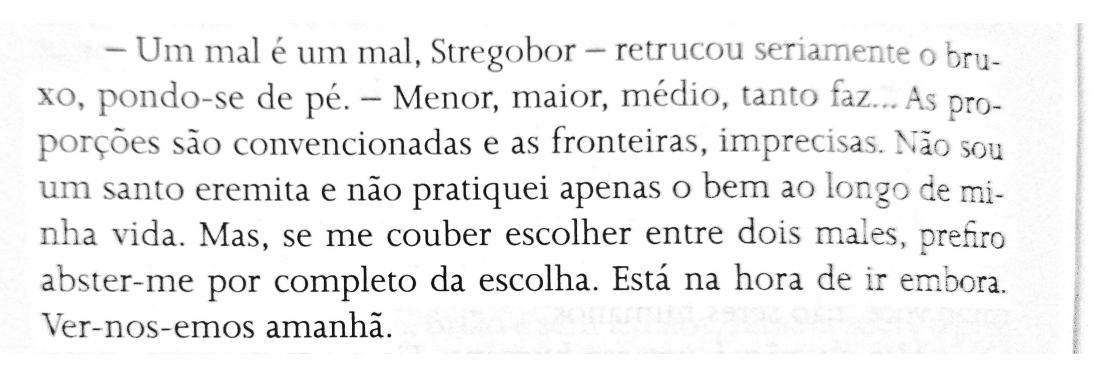

In [57]:
cv2_imshow(imagem)

In [58]:
texto = pytesseract.image_to_string(imagem)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente 0 bry.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porgdes sao convencionadas e as fronteiras, imprecisas.
um santo eremita e nao pratiquei apenas 0 bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Esta na hora de ir embora.
Ver-nos-emos amanha.

 

S pro-

40 SOU

 

 



Para melhorar o texto extraido usamos o PSM na hora de eextrair o

In [59]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [60]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [61]:
texto = pytesseract.image_to_string(imagem, lang = 'por', config = config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



# 3. Realizando o procedimento com as placas de carros


Primeiro abrimos a imagem e transformamos ela para uma escala de cinza para que o tesseract possa reconhecer melhor os caracteres

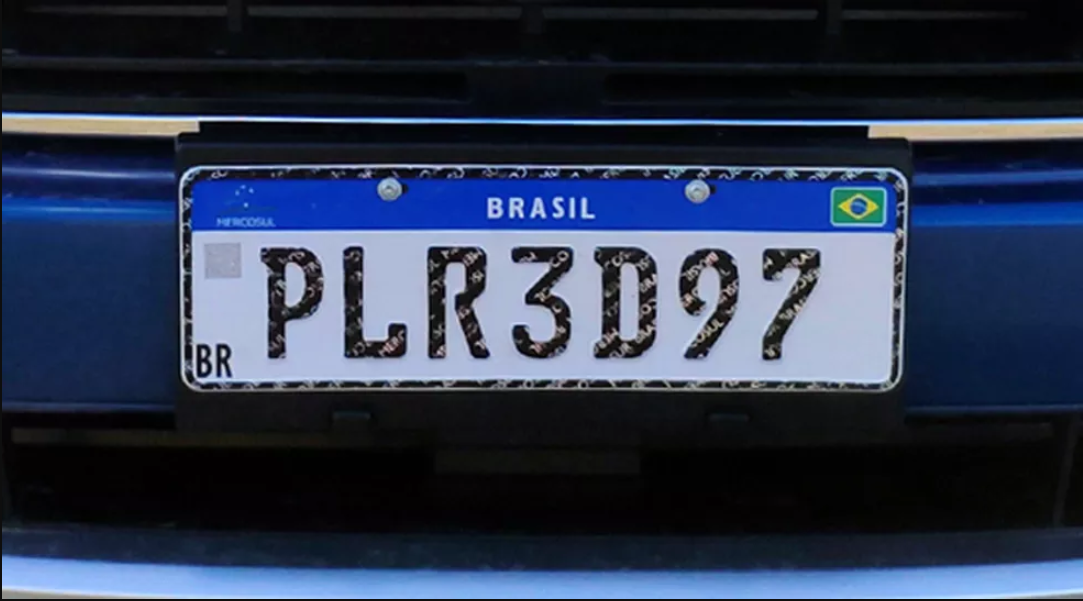

In [62]:
imagem2 = cv2.imread('/content/Imagens/placa_carro1.png')
cv2_imshow(imagem2)

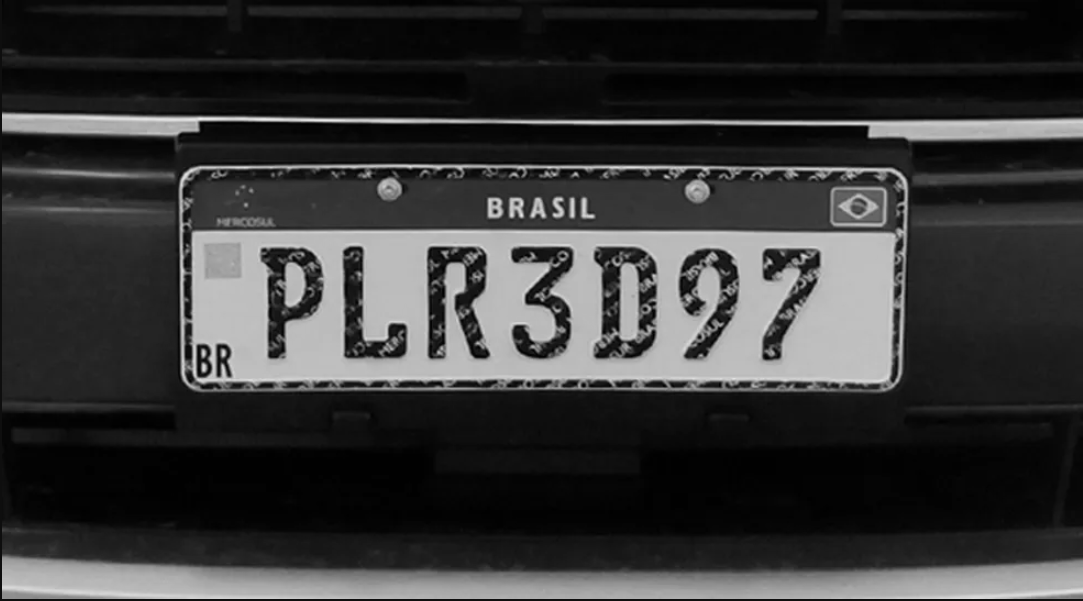

In [63]:
imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem2)

In [64]:
config_tesseract = '--tessdata-dir tessdata'

Nesta caso o texto não é extraído conforme o exemplo abaixo. Vamos começar a tratar as imagens.

In [65]:
texto = pytesseract.image_to_string(imagem2, lang = 'por', config = config_tesseract)
print(texto)

# 4. Limiarização

Vamos comparar todos os pixeis de uma imagem com um valor limite que será definido da escala de cinza. A escala varia de 0 (preto) até 255(branco).

Tudo que estiver abaixo deste valor será "transformado" em preto

link opencv: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html


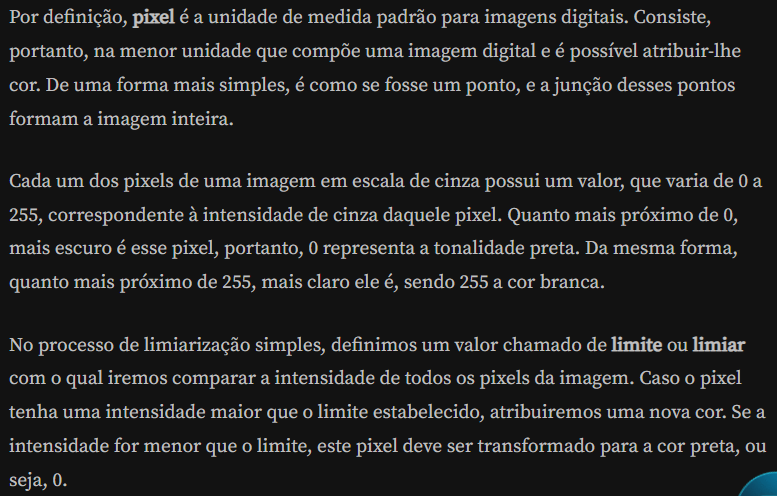

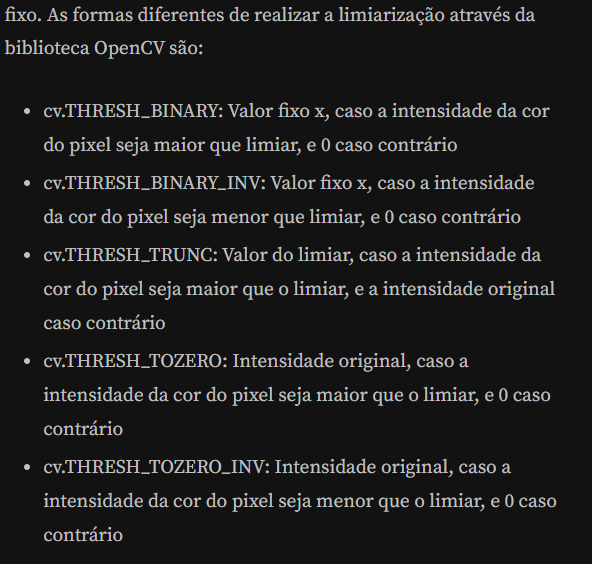

## **Limiarização Simples**

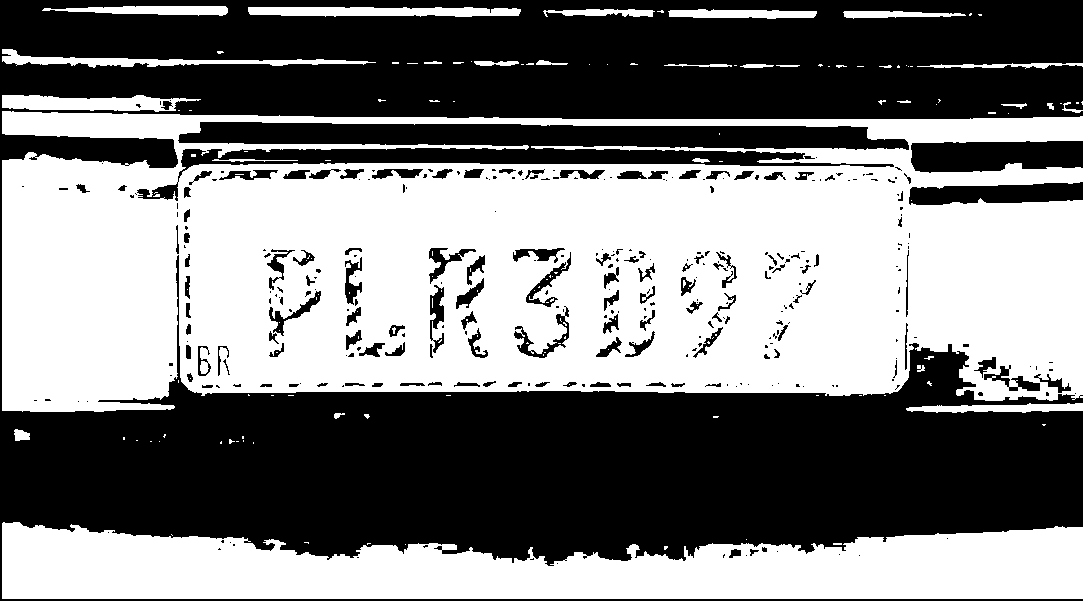

In [66]:
##cv2.threshold --> retorna o valor do limiar e a imagem limiarizada
## parametros -> 1 imagem em escala de cinza,
##2 limiar,
##3 cor que quero transformar caso o valor > limear,
## 4 métoro de limiaização
limiar = 25
valor, lim_simples = cv2.threshold(imagem2, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

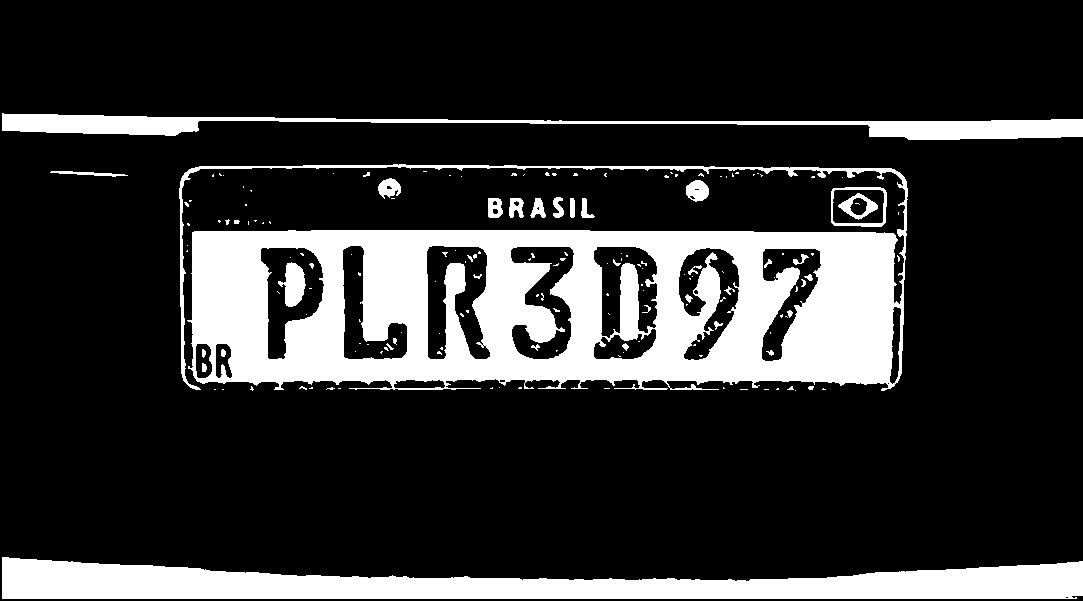

In [67]:
##cv2.threshold --> retorna o valor do limiar e a imagem limiarizada
## parametros -> 1 imagem em escala de cinza,
##2 limiar,
##3 cor que quero transformar caso o valor > limear,
## 4 métoro de limiaização
limiar = 125
valor, lim_simples = cv2.threshold(imagem2, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

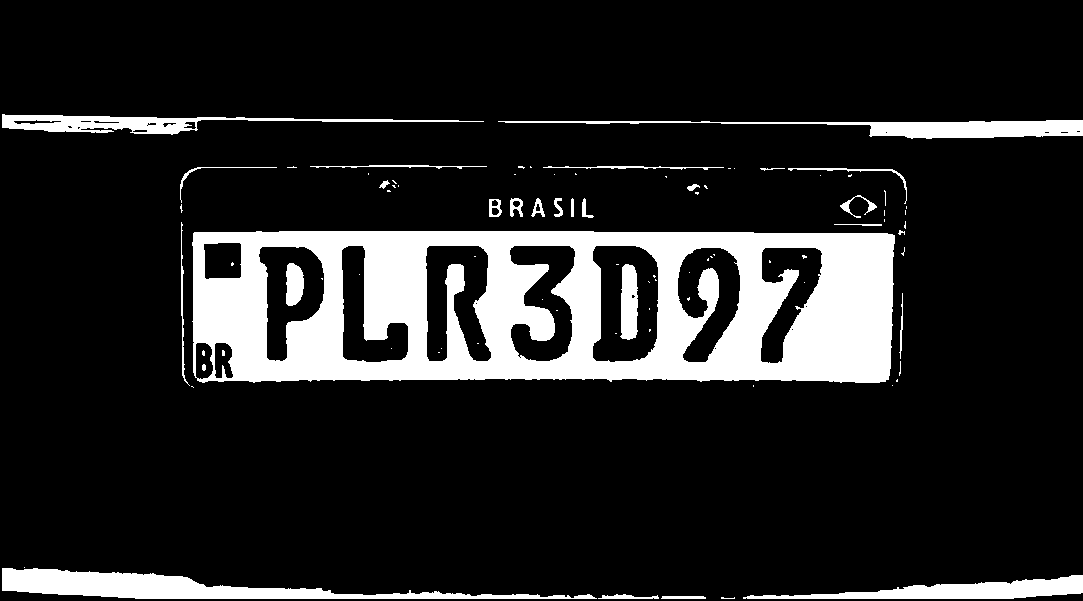

In [68]:
##cv2.threshold --> retorna o valor do limiar e a imagem limiarizada
## parametros -> 1 imagem em escala de cinza,
##2 limiar,
##3 cor que quero transformar caso o valor > limear,
## 4 métoro de limiaização
limiar = 170
valor, lim_simples = cv2.threshold(imagem2, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

## **Limiarização Adaptativa**

Pode ser por média ou gausseana.
negrito
Neste caso é utilizado um limite para cada região da figura separadamente


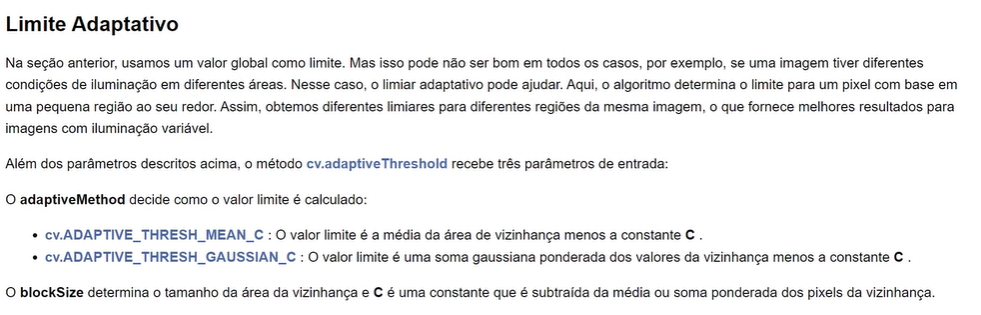

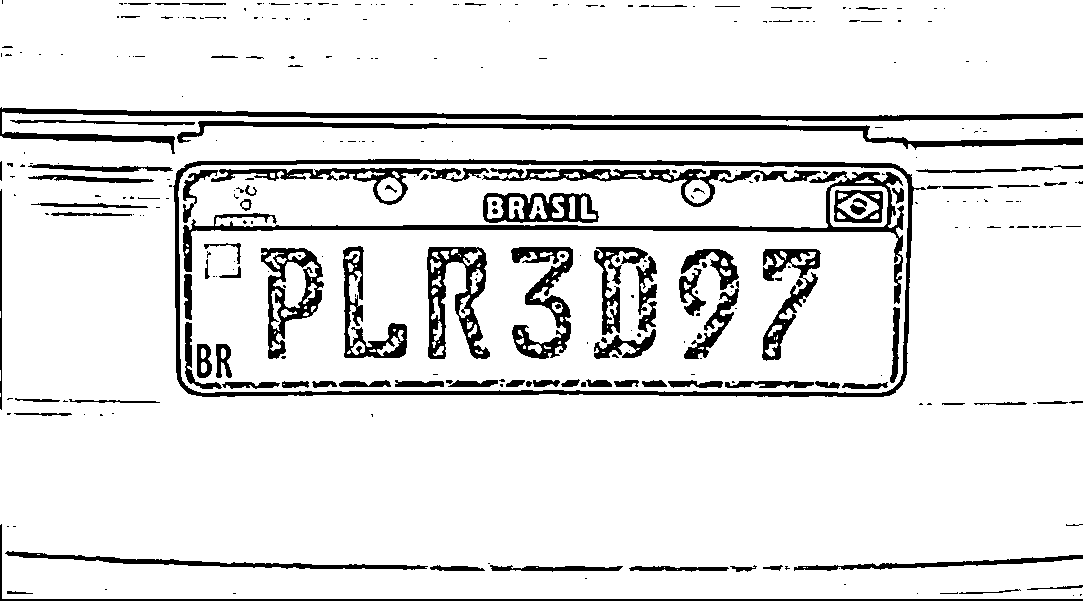

In [69]:
#Parâmetros: 1- imagem, 2- valor para qual vai transformar, 3 - modo (média ou gaussiana)
# 4- tamanho da região que vai tirar a média da limiar e 5 - constante

lim_adapt = cv2.adaptiveThreshold(imagem2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

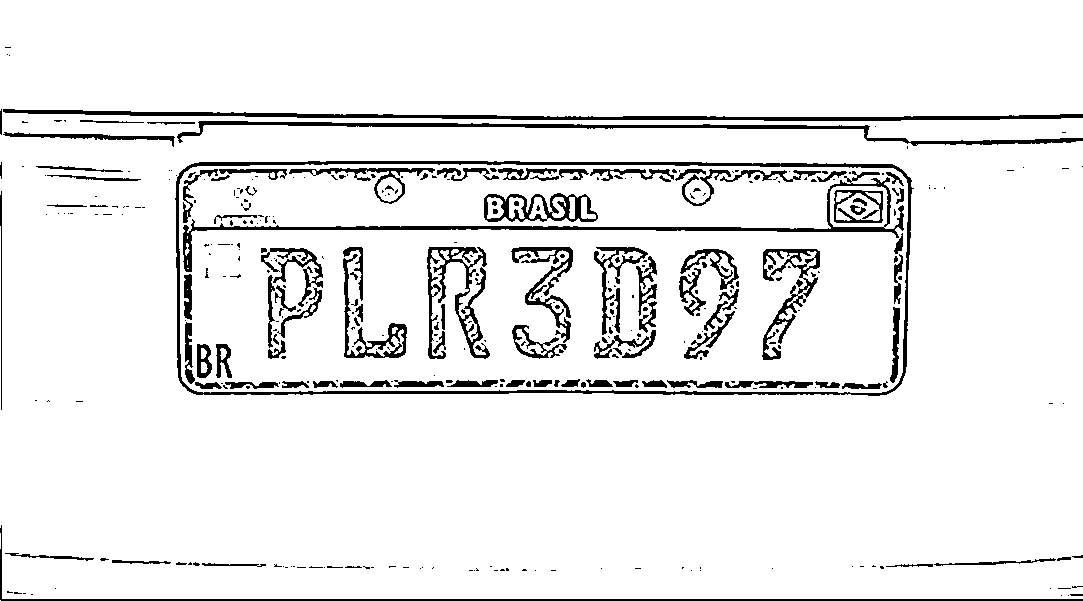

In [70]:
#Parâmetros: 1- imagem, 2- valor para qual vai transformar, 3 - modo (média ou gaussiana)
# 4- tamanho da região que vai tirar a média da limiar e 5 - constante

lim_adapt = cv2.adaptiveThreshold(imagem2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

## **Limiarização de Otsu**

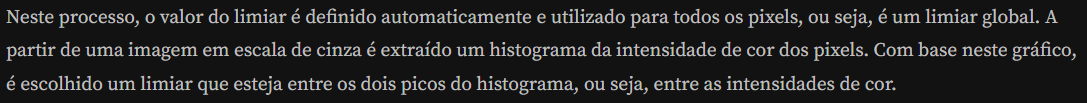

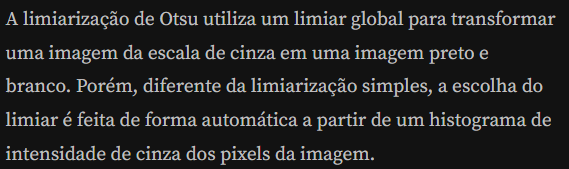

1. criar histograma para verificar a intensidade das cores da imagem em escala de cinza

In [71]:
imagem2

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

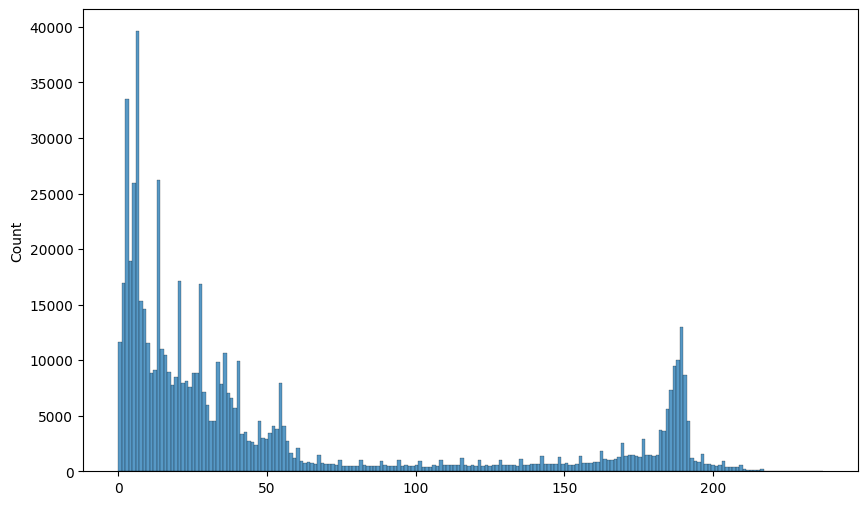

In [72]:
import seaborn as sns
ax = sns.histplot(imagem2.flatten())   #flatten transforma o array da imagem em um array de uma única dimensão
ax.figure.set_size_inches(10,6)

2. criar a imagem com a limiarização

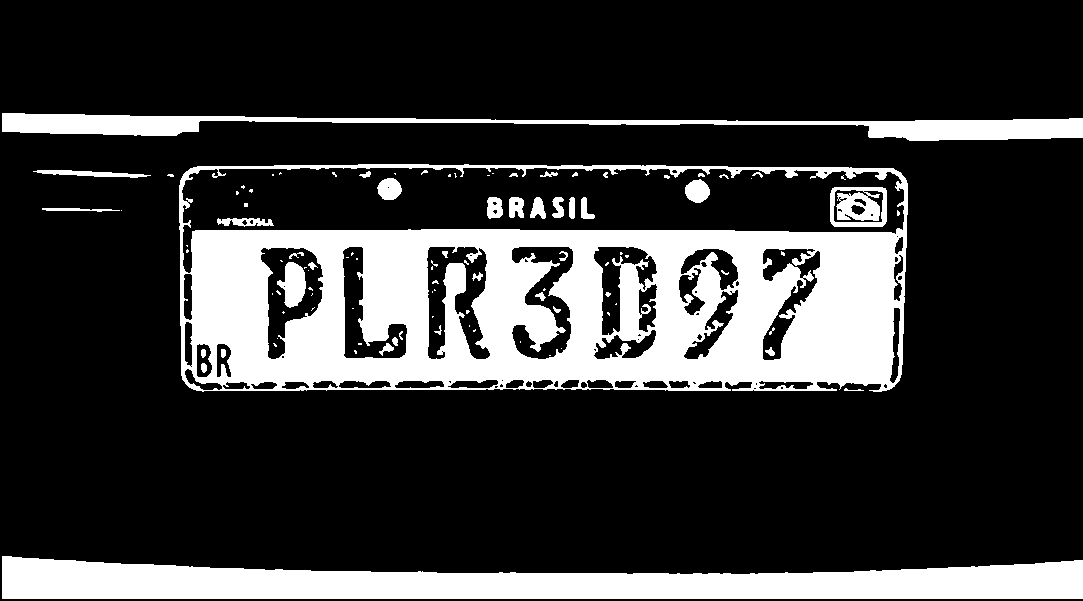


limiar: 96.0


In [73]:
valor,lim_ostu = cv2.threshold(imagem2, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_ostu)
print(f'\nlimiar: {valor}')

3. Extrair o texto da imagem limiarizada

In [74]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(lim_ostu, lang = 'por', config = config_tesseract)
print(texto)

# 5. Transformação Morfológica

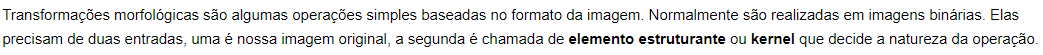

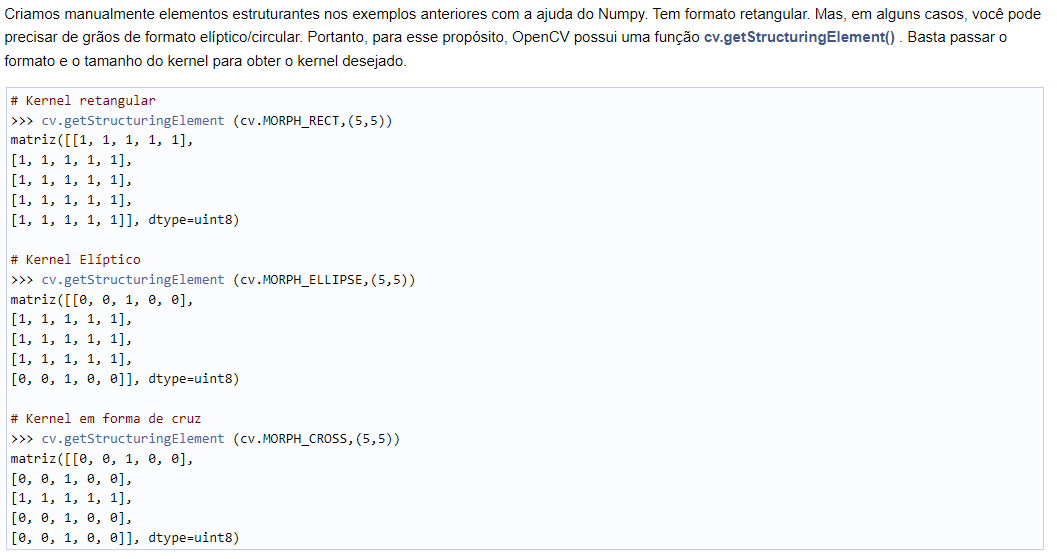

## Erosão


A erosão faz com que os pixeis pretos fiquem maiores e com isso faz com que as falhas de pontos brancos desapareçam.
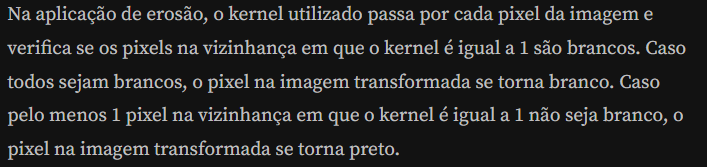

In [75]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

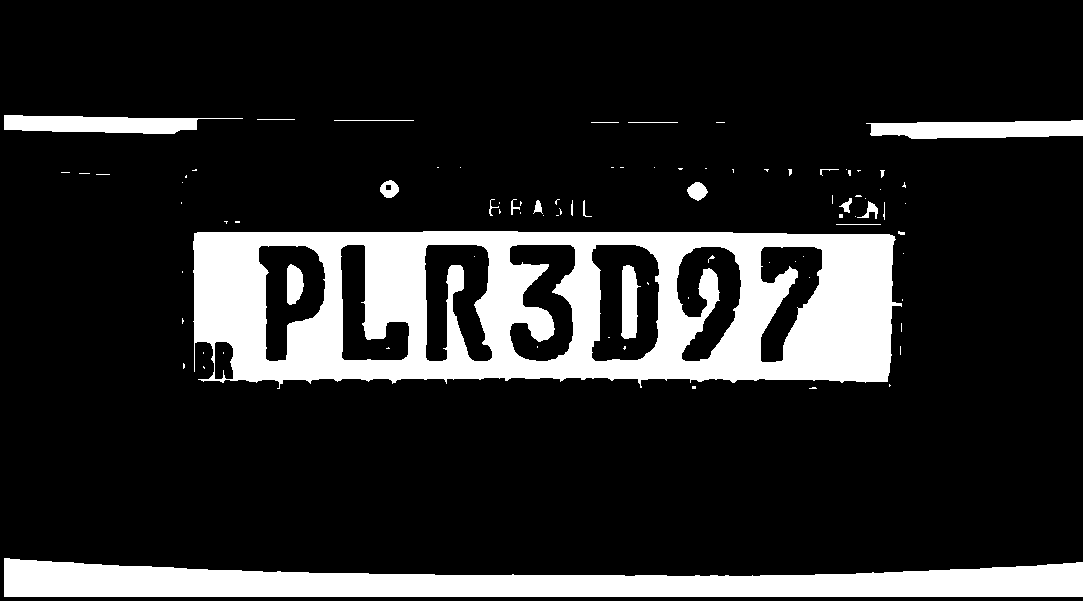

In [77]:
erosao = cv2.erode(lim_ostu, kernel)
cv2_imshow(erosao)

In [109]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang = 'por',  config = config_tesseract)
print(texto)

, PLRSD97 |
— :” NS ss



## Dilatação

A dilatação faz com que os pixeis brancos fiquem maiores. Neste caso os pontos brancos "de falha" ficam mais aparentes.
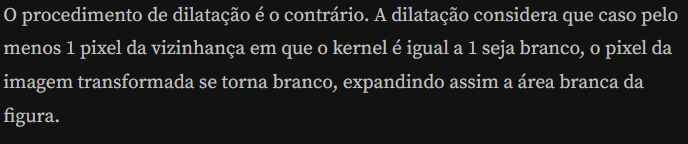

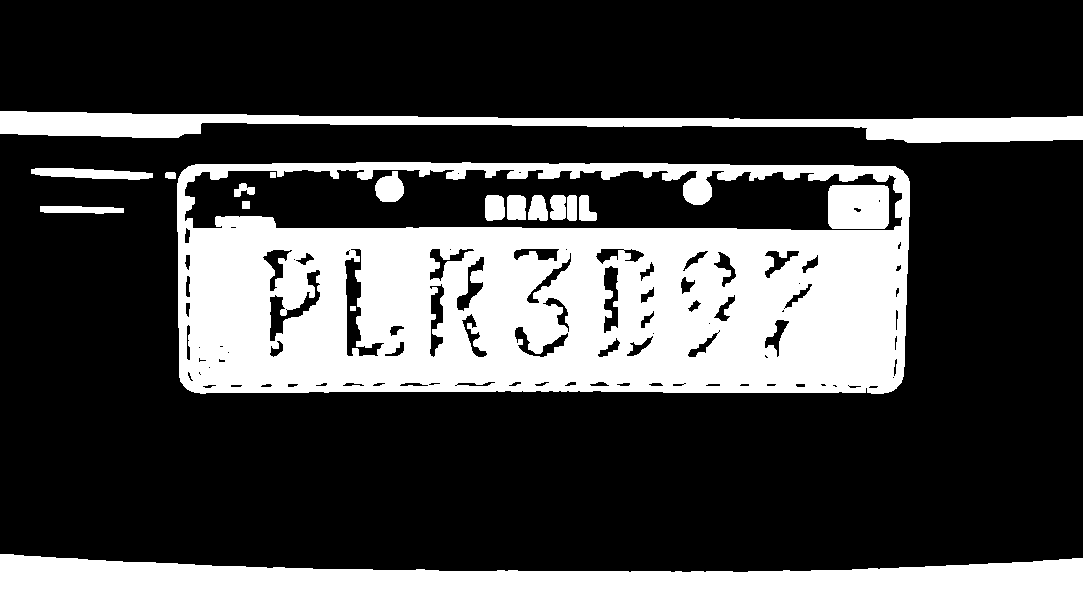

In [78]:
dilatacao = cv2.dilate(lim_ostu, kernel)
cv2_imshow(dilatacao)

## Abertura

A abertura é um processo que depende da erosão e da dilatação. Neste caso a ideia é que seja realizado uma erosão e em seguida uma dilatação. Desta forma, as falhas irão sumir na erosão e o caractere irá "aumentar" na dilatação.


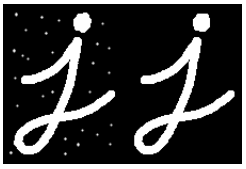

In [79]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

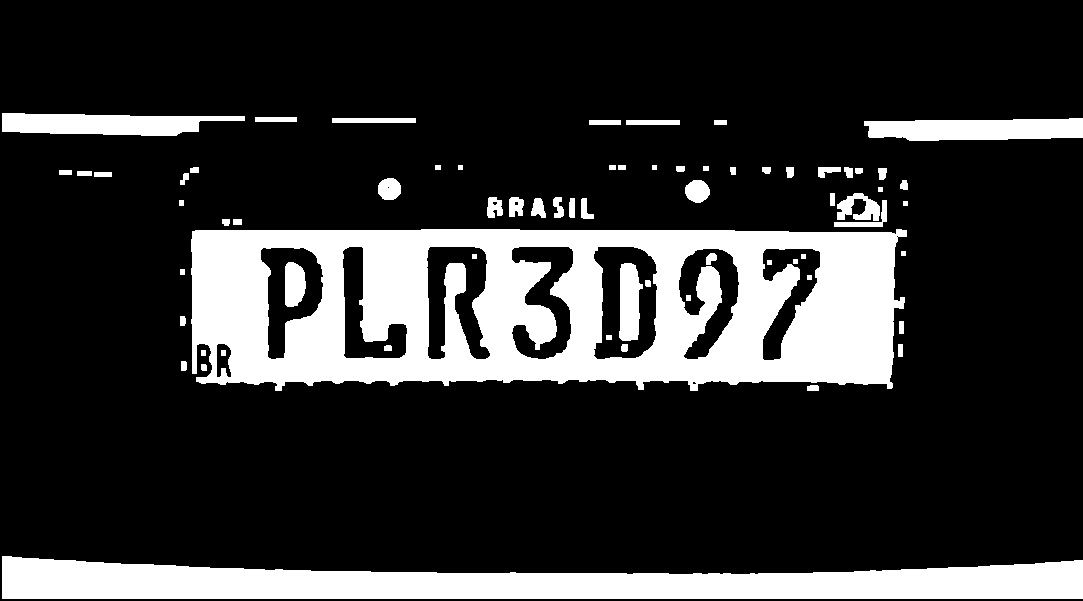

In [82]:
abertura = cv2.morphologyEx (lim_ostu, cv2.MORPH_OPEN, kernel)
cv2_imshow(abertura)

## Fechamento

O fechamento é o processo contrário da abertura, ou seja, primeiro é feito uma dilatação e em seguida é feito uma erosão.

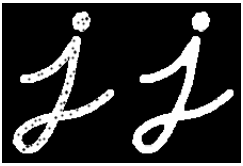

In [83]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

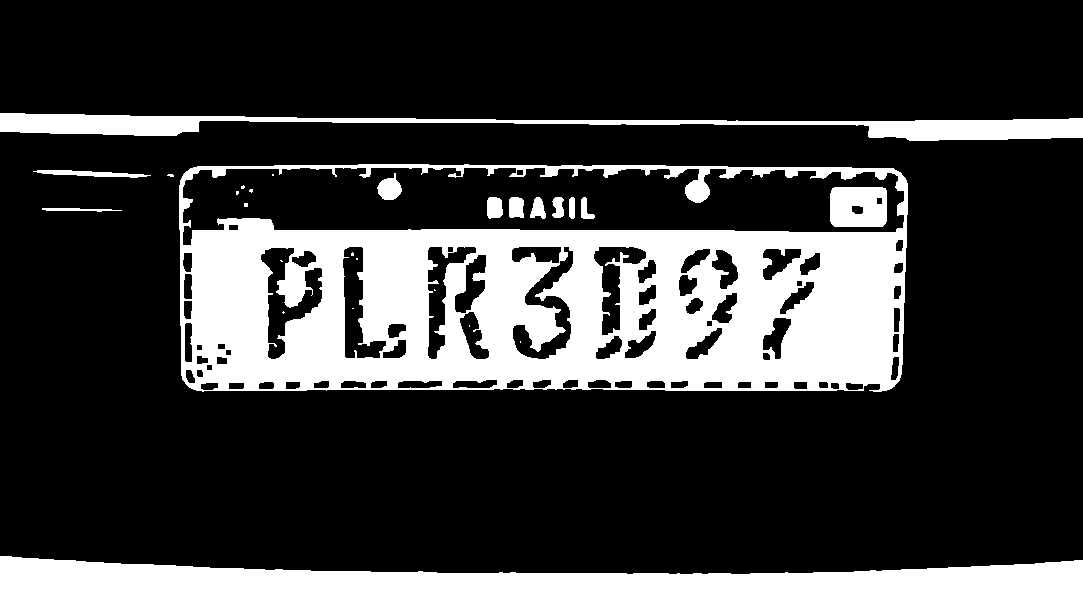

In [84]:
fechamento = cv2.morphologyEx (lim_ostu, cv2.MORPH_CLOSE, kernel)
cv2_imshow(fechamento)

## Gradiente Morfológico

O gradiente morfológico é a diferença entre a dilatação e a erosão de uma imagem.

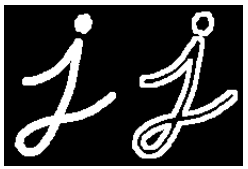

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

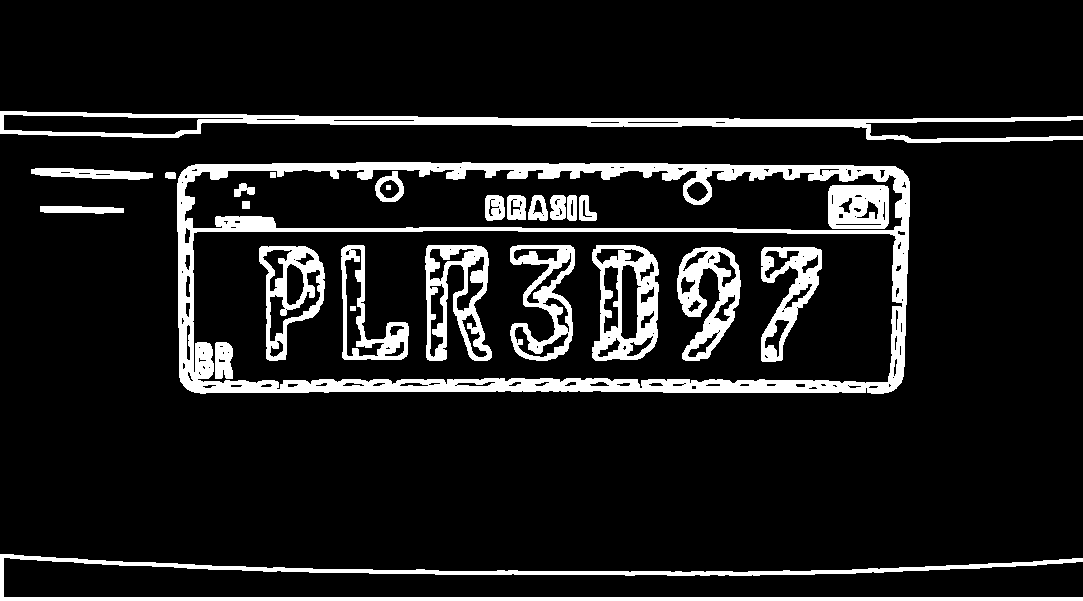

In [87]:
gradiente = cv2.morphologyEx (lim_ostu, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradiente)

## Cartola

Cartola é a diferença entre a imagem de entrada e a abertura da imagem. Neste caso pode aplicar o cartola tanto para a imagem limiarizada quanto para a de escala de cinza.  

Essa técnica é muito útil quando queremos realçar objetos ou regiões claras que estão em um fundo escuro, pois ela remove o fundo e deixa apenas as áreas de interesse.

Então, em resumo, a Cartola é uma transformação morfológica que visa destacar as regiões claras de uma imagem, removendo o fundo escuro e deixando apenas os objetos de interesse.

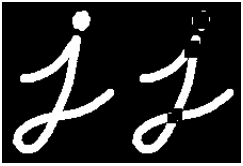

In [103]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))  #40,13 --> tamanho da placa

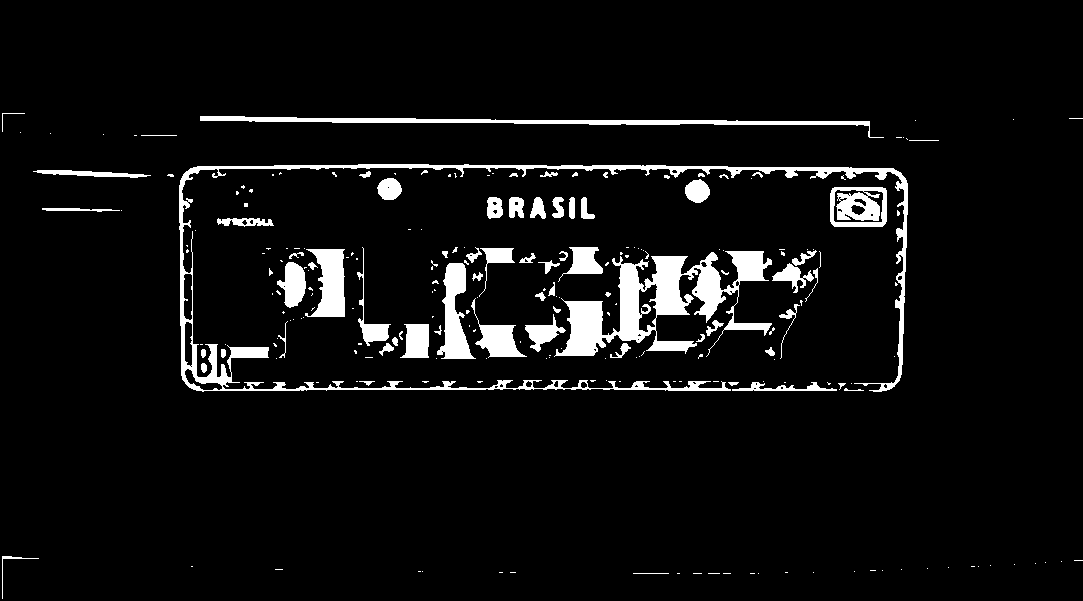

In [104]:
cartola = cv2.morphologyEx (lim_ostu, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)

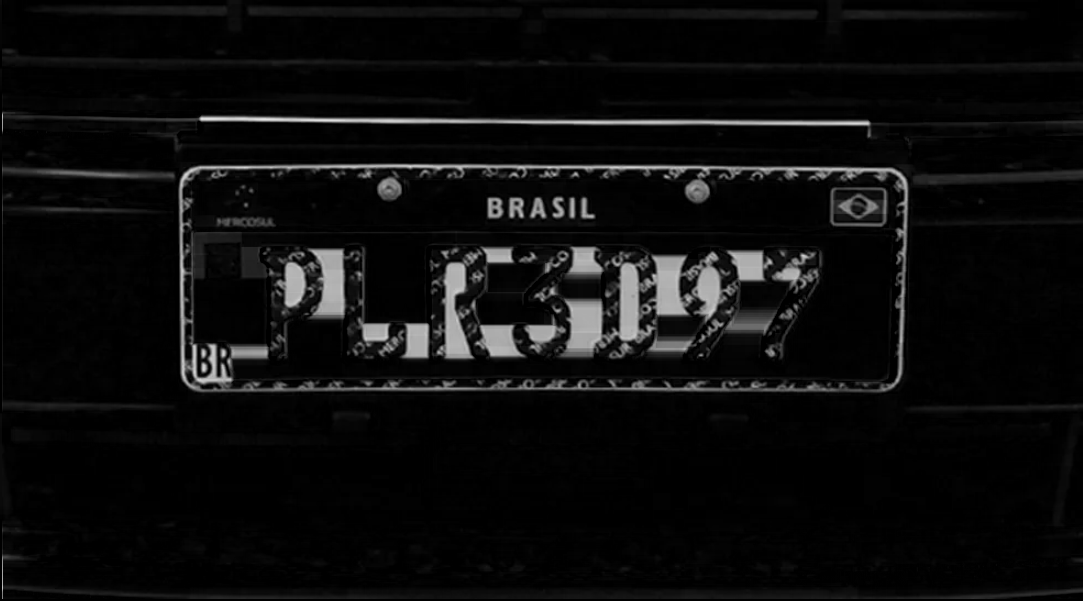

In [105]:
cartola = cv2.morphologyEx (imagem2, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)

## Chapéu Preto

Chapéu preto é a diferença entre o fechamento da imagem de entrada e a imagem de entrada. Neste caso pode aplicar o cartola tanto para a imagem limiarizada quanto para a de escala de cinza.

Essa técnica é muito útil quando queremos realçar objetos ou regiões escuras que estão em um fundo claro, pois ela remove o fundo e deixa apenas as áreas de interesse.

Então, em resumo, o Chapéu Preto é uma transformação morfológica que visa destacar as regiões escuras de uma imagem, removendo o fundo claro e deixando apenas os objetos de interesse.


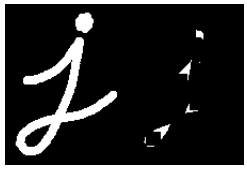

In [106]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))  #40,13 --> tamanho da placa

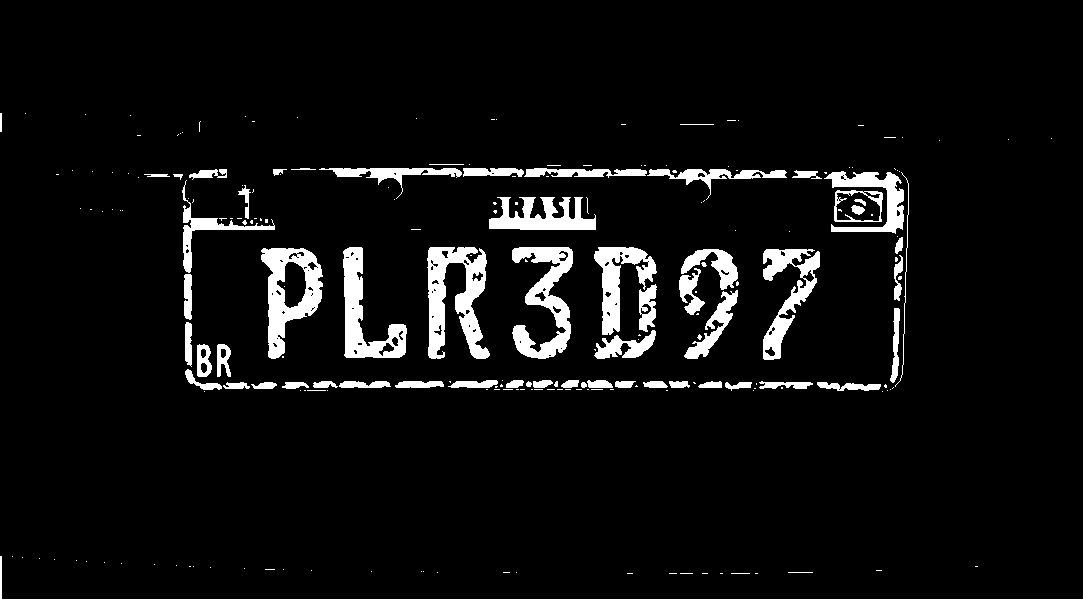

In [107]:
chapeu_preto = cv2.morphologyEx (lim_ostu, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)

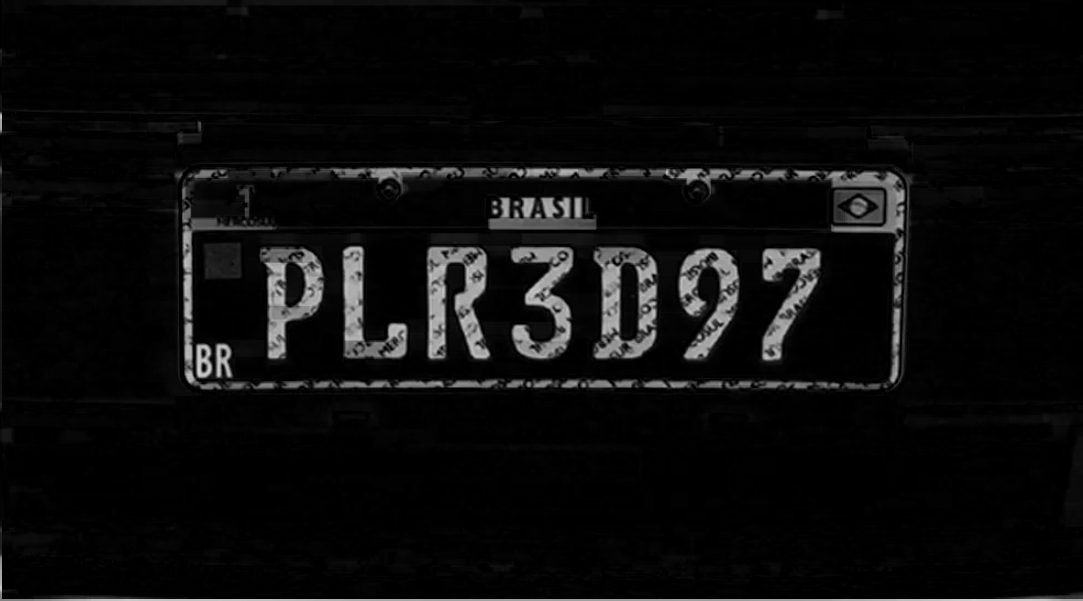

In [108]:
chapeu_preto = cv2.morphologyEx (imagem2, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)